In [2]:
import pandas as pd
import os
import numpy as np
import random
import scipy.special as sc
import os

In [2]:
df1 = pd.read_csv(r'2035.csv')

In [14]:
df1.iloc[50]

2035-1-1      0.0000
2035-1-2      0.0000
2035-1-3      0.0000
2035-1-4      0.0000
2035-1-5      0.0000
               ...  
2035-12-27    0.0000
2035-12-28    0.0000
2035-12-29    3.1375
2035-12-30    0.0000
2035-12-31    0.0000
Name: Subbasin-1, Length: 365, dtype: float64

In [260]:
inputFolder=r'CMIP\rainfall_data_total'
subbassins=52
model=[[] for _ in range(subbassins)]
for j in range(2): #2040-2060 (25,45)
    file=os.listdir(inputFolder)[j]
    for i in np.arange(0,subbassins): #(subbassins)
        file_path1=os.path.join(inputFolder, file)
        df1 = pd.read_csv(file_path1,index_col='name')
        model[i].append(df1.iloc[i,:])

In [261]:
flat_list=[[] for _ in range(subbassins)]
for i in range(subbassins):
    flat_list[i] = [item for sublist in model[i] for item in sublist]

In [340]:
inputFolder=r'CMIP\rainfall_data_total'
columns=[]
for j in range(2):
    file=os.listdir(inputFolder)[j]
    file_path1=os.path.join(inputFolder, file)
    df1 = pd.read_csv(file_path1,index_col='name')
    columns= columns + list(df1.columns)    

In [305]:
casc_step_0=flat_list[0]

In [306]:
len(casc_step_0)

730

In [159]:
iso_box[0]

[0, 0.16, 0.43]

In [99]:
casc_step_1=[[0] * 2 for i in range(len(casc_step_0))]

In [173]:
casc_step_0[200]

1.8000000000000005

In [174]:
casc_step_1[200]

[1.8000000000000005, 0]

In [194]:
def f(x,a):
    return (1/sc.beta(a,a))*x**(a-1)*(1-x)**(a-1)

In [195]:
x=np.linspace(0.01,0.99,10)
z=f(x,0.9)

In [205]:
def f(x,a):
    return (1/sc.gamma(a))*x**(a-1)*np.exp(-x)

In [223]:
x1=f(random.random(),0.9)
x2=f(random.random(),0.9)
w1=x1/(x1+x2)
w2=x2/(x1+x2)

In [224]:
w1+w2

1.0

In [208]:
import matplotlib.pyplot as plt

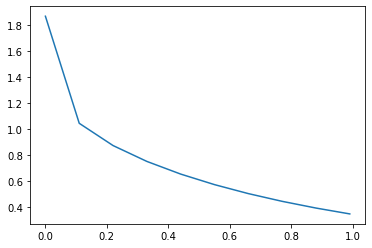

In [209]:
plt.plot(x,z)

## start

In [3]:
path='E:\program'
os.chdir(path)

In [4]:
inputFolder=r'CMIP\rainfall_data_total'
subbassins=52
per_subbassin=[[] for _ in range(subbassins)]
for j in range(2): # (25,45)
    file=os.listdir(inputFolder)[j]
    file_path1=os.path.join(inputFolder, file)
    df1 = pd.read_csv(file_path1,index_col='name')
    for i in np.arange(0,subbassins): #(subbassins)
        per_subbassin[i].append(df1.iloc[i,:])

In [ ]:
df1.iloc[:,190:219]

In [4]:
#juli-december 2006 
inputFolder=r'CMIP\rainfall_data_total'
subbassins=52
per_subbassin=[[] for _ in range(subbassins)]
file=os.listdir(inputFolder)[5]
file_path1=os.path.join(inputFolder, file)
df1 = pd.read_csv(file_path1,index_col='name')
df1=df1.iloc[:,181:]
for i in np.arange(0,subbassins): #(subbassins)
    per_subbassin[i].append(df1.iloc[i,:])

In [5]:
daily_rainfall=[[] for _ in range(subbassins)]
for i in range(subbassins):
    daily_rainfall[i] = [item for sublist in per_subbassin[i] for item in sublist]

In [395]:
#normal
inputFolder=r'CMIP\rainfall_data_total'
columns=[]
for j in range(2):
    file=os.listdir(inputFolder)[j]
    file_path1=os.path.join(inputFolder, file)
    df1 = pd.read_csv(file_path1,index_col='name')
    columns= columns + list(df1.columns)    

In [6]:
#calibration
columns=df1.columns

In [7]:
index=df1.index

In [8]:
iso_box=[[0,0.16,0.43],[0,0.25,0.36],[0.19,0.24,0.31],[0.06,0.12,0.38],[0.04,0.25,0.4],[0,0.1,0.36],[0,0.08,0.22]]
start_box=[[0.19,0.3,0.42],[0.07,0.32,0.53],[0.08,0.23,0.44],[0.09,.19,0.55],[0.09,0.45,0.53],[0.21,0.35,0.58],[0.21,0.29,0.62]]
encl_box=[[0.45,0.85,0.97],[0.35,0.75,0.93],[0.28,0.67,0.91],[0.25,0.66,0.94],[0.26,0.73,0.91],[0.47,0.81,0.89],[0.59,0.86,0.95]]
end_box=[[0.15,0.42,0.52],[0.0,0.37,0.56],[0.07,0.18,0.47],[0.09,0.31,0.44],[0.05,0.48,0.6],[0.03,0.29,0.41],[0.07,0.62,0.64]]

In [9]:
beta_iso=[0.9,0.7,0.5,0.3,0,-0.4,-0.4]
beta_star=[1.3,1,0.7,0.4,0.1,0.1,0.1]
beta_encl=[1.2,0.95,0.7,0.4,0.25,0.3,0.3]
beta_end=[1.3,1,0.7,0.35,0.1,0.1,0.1]

In [10]:
def power(my_list):
    return [ np.exp(x) for x in my_list]

In [11]:
beta_isolated=power(beta_iso)
beta_starting=power(beta_star)
beta_enclosed=power(beta_encl)
beta_ending=power(beta_end)

In [12]:
beta_ending

[3.6692966676192444,
 2.718281828459045,
 2.0137527074704766,
 1.4190675485932571,
 1.1051709180756477,
 1.1051709180756477,
 1.1051709180756477]

In [95]:
import matplotlib.pyplot as plt
import math

In [121]:
def f(x,a):
    return (math.gamma(2*a))/(math.gamma(a**(a-1))**2)*(1-x)**(a-1)

In [114]:
def f(x,a):
    return (math.gamma(2*a)/(math.gamma(2*a))**2)*a**(a-1)*(1-x)**(a-1)

In [104]:
def f(x,a):
    return (1/sc.beta(a,a))*x**(a-1)*(1-x)**(a-1)

In [128]:
def f(x,a):
    return (1/sc.beta(a,a))*x**(a-1)*(1-x)**(a-1)

In [129]:
from sklearn import preprocessing

In [184]:
def f(x,a):
    return (1/sc.gamma(a))*x**(a-1)*np.exp(-x)

In [207]:
a=f(random.random(),1)
b=f(random.random(),1)
a2=a/(a+b)
b2=b/(a+b)
a2,b2

(0.5149042995055483, 0.4850957004944516)

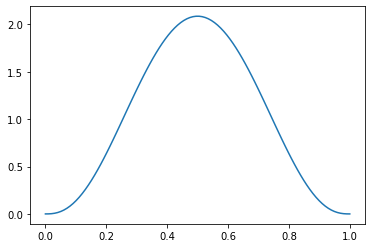

In [134]:
normalized_arr = preprocessing.normalize([z])
#normalized_arr
plt.plot(x,z)

In [13]:
def func(cluster_casc_0,random_seed,cascade_step,columns,index,amount_chunks): #cascade_step=cascade_step-1
    random.seed(random_seed)
    subbassins=52
    df_casc_1=pd.DataFrame(columns=columns,index=index)
    list_casc_1=[[] for _ in range(subbassins)]
    list_of_tuples=[[] for _ in range(subbassins)]

    
    #func for chunks
    
    def chunks(lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i:i + n]
        
        
    #func for weights
    def f(x,a):
        return (1/sc.gamma(a))*x**(a-1)*np.exp(-x)
    
    for j in range(subbassins):
        casc_step_0=cluster_casc_0[j]
        #select the 33 and 66 percentiles
        a=[num for num in casc_step_0 if num]
        dev_1=np.percentile(a,33)
        dev_2=np.percentile(a,67)

        #create a list of the cascade step (double the length of the original list)
        casc_step_1=[[0] * 2 for z in range(len(casc_step_0))]

        for i in range(len(casc_step_1)):
            if casc_step_0[i]==0:
                casc_step_1[i][0]=0
                casc_step_1[i][1]=0
            else:
                #begin point
                if (i==0):
                    #if startbox
                    if (casc_step_0[i+1]>0):
                        if casc_step_0[i]<dev_1:
                            p1=start_box[cascade_step][0]
                            p2=start_box[cascade_step][0]+(1-start_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_starting[cascade_step])
                                x2=f(random.random(),beta_starting[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=start_box[cascade_step][1]
                            p2=start_box[cascade_step][1]+(1-start_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_starting[cascade_step])
                                x2=f(random.random(),beta_starting[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=3
                        else: 
                            p1=start_box[cascade_step][2]
                            p2=start_box[cascade_step][2]+(1-start_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_starting[cascade_step])
                                x2=f(random.random(),beta_starting[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                    #if isolated
                    if (casc_step_0[i+1]==0):
                        if casc_step_0[i]<dev_1:
                            p1=iso_box[cascade_step][0]
                            p2=iso_box[cascade_step][0]+(1-iso_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]                        
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=iso_box[cascade_step][1]
                            p2=iso_box[cascade_step][1]+(1-iso_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]          
                        #vc=3
                        else: 
                            p1=iso_box[cascade_step][2]
                            p2=iso_box[cascade_step][2]+(1-iso_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]         
                #end point
                if (i==-1):
                    #if isolated
                    if (casc_step_0[i-1]==0):
                        if casc_step_0[i]<dev_1:
                            p1=iso_box[cascade_step][0]
                            p2=iso_box[cascade_step][0]+(1-iso_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]                        
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=iso_box[cascade_step][1]
                            p2=iso_box[cascade_step][1]+(1-iso_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]          
                        #vc=3
                        else: 
                            p1=iso_box[cascade_step][2]
                            p2=iso_box[cascade_step][2]+(1-iso_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                    #if endbox        
                    if (casc_step_0[i-1]>0):
                        #vc=1
                        if casc_step_0[i]<dev_1:
                            p1=end_box[cascade_step][0]
                            p2=end_box[cascade_step][0]+(1-end_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_ending[cascade_step])
                                x2=f(random.random(),beta_ending[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=end_box[cascade_step][1]
                            p2=end_box[cascade_step][1]+(1-end_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_ending[cascade_step])
                                x2=f(random.random(),beta_ending[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=3
                        else: 
                            p1=end_box[cascade_step][2]
                            p2=end_box[cascade_step][2]+(1-end_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_ending[cascade_step])
                                x2=f(random.random(),beta_ending[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]




                #the rest
                else:
                    #isolated box
                    if (casc_step_0[i-1]==0) & (casc_step_0[i+1]==0):
                        #vc=1
                        if casc_step_0[i]<dev_1:
                            p1=iso_box[cascade_step][0]
                            p2=iso_box[cascade_step][0]+(1-iso_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]                        
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=iso_box[cascade_step][1]
                            p2=iso_box[cascade_step][1]+(1-iso_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]        
                        #vc=3
                        else: 
                            p1=iso_box[cascade_step][2]
                            p2=iso_box[cascade_step][2]+(1-iso_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_isolated[cascade_step])
                                x2=f(random.random(),beta_isolated[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]          




                    #enclosed box
                    elif (casc_step_0[i-1]>0) & (casc_step_0[i+1]>0):
                        #vc=1
                        if casc_step_0[i]<dev_1:
                            p1=encl_box[cascade_step][0]
                            p2=encl_box[cascade_step][0]+(1-encl_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_enclosed[cascade_step])
                                x2=f(random.random(),beta_enclosed[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]                  
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=encl_box[cascade_step][1]
                            p2=encl_box[cascade_step][1]+(1-encl_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_enclosed[cascade_step])
                                x2=f(random.random(),beta_enclosed[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]          
                        #vc=3
                        else: 
                            p1=encl_box[cascade_step][2]
                            p2=encl_box[cascade_step][2]+(1-encl_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_enclosed[cascade_step])
                                x2=f(random.random(),beta_enclosed[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]   



                    #starting box
                    elif (casc_step_0[i-1]==0) & (casc_step_0[i+1]>0):
                        #vc=1
                        if casc_step_0[i]<dev_1:
                            p1=start_box[cascade_step][0]
                            p2=start_box[cascade_step][0]+(1-start_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_starting[cascade_step])
                                x2=f(random.random(),beta_starting[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=start_box[cascade_step][1]
                            p2=start_box[cascade_step][1]+(1-start_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_starting[cascade_step])
                                x2=f(random.random(),beta_starting[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=3
                        else: 
                            p1=start_box[cascade_step][2]
                            p2=start_box[cascade_step][2]+(1-start_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_starting[cascade_step])
                                x2=f(random.random(),beta_starting[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]



                    #ending box
                    elif (casc_step_0[i-1]>0) & (casc_step_0[i+1]==0):
                        #vc=1
                        if casc_step_0[i]<dev_1:
                            p1=end_box[cascade_step][0]
                            p2=end_box[cascade_step][0]+(1-end_box[cascade_step][0])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_ending[cascade_step])
                                x2=f(random.random(),beta_ending[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=2
                        elif dev_1<casc_step_0[i]<dev_2:
                            p1=end_box[cascade_step][1]
                            p2=end_box[cascade_step][1]+(1-end_box[cascade_step][1])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_ending[cascade_step])
                                x2=f(random.random(),beta_ending[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
                        #vc=3
                        else: 
                            p1=end_box[cascade_step][2]
                            p2=end_box[cascade_step][2]+(1-end_box[cascade_step][2])/2
                            r_number=random.random()
                            if r_number<p1:
                                x1=f(random.random(),beta_ending[cascade_step])
                                x2=f(random.random(),beta_ending[cascade_step])
                                w1=x1/(x1+x2)
                                w2=x2/(x1+x2)
                                casc_step_1[i][0]=casc_step_0[i]*w1
                                casc_step_1[i][1]=casc_step_0[i]*w2
                            elif p1<r_number<p2:
                                casc_step_1[i][0]=casc_step_0[i]
                                casc_step_1[i][1]=0
                            else:
                                casc_step_1[i][0]=0
                                casc_step_1[i][1]=casc_step_0[i]
        
        list_casc_1[j] = [item for sublist in casc_step_1 for item in sublist]                               
    for q in range(len(list_casc_1)):
        list_of_tuples[q]=list(chunks(list_casc_1[q], amount_chunks))                       
        df_casc_1.iloc[q]=list_of_tuples[q]
    return list_casc_1,df_casc_1

iterations=100
seeds=[[] for _ in range(iterations)]
for i in range(iterations):
    seed=[]
    for j in range(7):
        random_data = os.urandom(4)
        seed=seed+[int.from_bytes(random_data, byteorder="big")]
    seeds[i]=seed

# storing to file
with open("seeds3.txt", 'wb') as f:
    pickle.dump((seeds), f)

In [14]:
import pickle

# loading from file
with open("seeds3.txt", 'rb') as f:
    seeds = pickle.load(f)

In [19]:
#validation
iterations=100
zero_values_total=[[] for _ in range(iterations)]
threshold_total=[[] for _ in range(iterations)]
mean_total=[[] for _ in range(iterations)]
std_total=[[] for _ in range(iterations)]
max_total=[[] for _ in range(iterations)]


for i in range(iterations):
    seed=seeds[i]
    list_casc_1,df_casc_1=func(daily_rainfall,seed[0],0,columns,index,2) #720 min
    list_casc_2,df_casc_2=func(list_casc_1,seed[1],1,columns,index,4) #360 min
    list_casc_3,df_casc_3=func(list_casc_2,seed[2],2,columns,index,8) # 180 min
    list_casc_4,df_casc_4=func(list_casc_3,seed[3],3,columns,index,16) #90 min
    list_casc_5,df_casc_5=func(list_casc_4,seed[4],4,columns,index,32) #45 min
    list_casc_6,df_casc_6=func(list_casc_5,seed[5],5,columns,index,64) #22.5 min
    list_casc_7,df_casc_7=func(list_casc_6,seed[6],6,columns,index,128) #11.25 min
    
    casc0=daily_rainfall[-1] #subbassin 39=-17
    casc1=list_casc_1[-1]
    casc2=list_casc_2[-1]
    casc3=list_casc_3[-1]
    casc4=list_casc_4[-1]
    casc5=list_casc_5[-1]
    casc6=list_casc_6[-1]
    casc7=list_casc_7[-1]    

    casc0_zero=casc0.count(0)/len(casc0)
    casc1_zero=casc1.count(0)/len(casc1)
    casc2_zero=casc2.count(0)/len(casc2)
    casc3_zero=casc3.count(0)/len(casc3)
    casc4_zero=casc4.count(0)/len(casc4)
    casc5_zero=casc5.count(0)/len(casc5)
    casc6_zero=casc6.count(0)/len(casc6)
    casc7_zero=casc7.count(0)/len(casc7)
    zero_values_total[i]=[casc0_zero,casc1_zero,casc2_zero,casc3_zero,casc4_zero,casc5_zero,casc6_zero,casc7_zero]

    casc0_thres=sum(i > 25 for i in casc0)
    casc1_thres=sum(i > 25 for i in casc1)
    casc2_thres=sum(i > 25 for i in casc2)
    casc3_thres=sum(i > 25 for i in casc3)
    casc4_thres=sum(i > 25 for i in casc4)
    casc5_thres=sum(i > 25 for i in casc5)
    casc6_thres=sum(i > 25 for i in casc6)
    casc7_thres=sum(i > 25 for i in casc7)
    threshold_total[i]=[casc0_thres,casc1_thres,casc2_thres,casc3_thres,casc4_thres,casc5_thres,casc6_thres,casc7_thres]

    casc0_mean=np.mean(casc0)
    casc1_mean=np.mean(casc1)
    casc2_mean=np.mean(casc2)
    casc3_mean=np.mean(casc3)
    casc4_mean=np.mean(casc4)
    casc5_mean=np.mean(casc5)
    casc6_mean=np.mean(casc6)
    casc7_mean=np.mean(casc7)
    mean_total[i]=[casc0_mean,casc1_mean,casc2_mean,casc3_mean,casc4_mean,casc5_mean,casc6_mean,casc7_mean]

    casc0_std=np.std(casc0)
    casc1_std=np.std(casc1)
    casc2_std=np.std(casc2)
    casc3_std=np.std(casc3)
    casc4_std=np.std(casc4)
    casc5_std=np.std(casc5)
    casc6_std=np.std(casc6)
    casc7_std=np.std(casc7)
    std_total[i]=[casc0_std,casc1_std,casc2_std,casc3_std,casc4_std,casc5_std,casc6_std,casc7_std]

    casc0_max=np.max(casc0)
    casc1_max=np.max(casc1)
    casc2_max=np.max(casc2)
    casc3_max=np.max(casc3)
    casc4_max=np.max(casc4)
    casc5_max=np.max(casc5)
    casc6_max=np.max(casc6)
    casc7_max=np.max(casc7)
    max_total[i]=[casc0_max,casc1_max,casc2_max,casc3_max,casc4_max,casc5_max,casc6_max,casc7_max]

In [20]:
zero_total2=[]
thres_total2=[]
mean_total2=[]
std_total2=[]
max_total2=[]
for j in range(8):
    a=[i[j] for i in zero_values_total]
    zero_total2=zero_total2+[np.median(a)]

    a=[i[j] for i in threshold_total]
    thres_total2=thres_total2+[np.median(a)]
    
    a=[i[j] for i in mean_total]
    mean_total2=mean_total2+[np.median(a)]
    
    a=[i[j] for i in std_total]
    std_total2=std_total2+[np.median(a)]

    a=[i[j] for i in max_total]
    max_total2=max_total2+[np.median(a)]    

In [21]:
df=pd.DataFrame(columns=['zero','threshold','mean','std','max'],index=['1 day','12 hours','6 hours','3 hours','90 minutes','45 minutes','22.5 minutes','11.25 minutes'])
df['zero']=zero_total2
df['threshold']=thres_total2
df['mean']=mean_total2
df['std']=std_total2
df['max']=max_total2


In [22]:
df

,zero,threshold,mean,std,max
1 day,0.440217,20.0,11.666087,33.047816,241.840000
12 hours,0.535326,24.0,5.833043,20.055273,201.550429
6 hours,0.639946,25.0,2.916522,11.674956,150.472320
3 hours,0.733696,22.0,1.458261,6.667281,109.810555
90 minutes,0.808764,14.0,0.729130,3.747465,74.960000
45 minutes,0.859375,8.0,0.364565,2.121424,65.797570
22.5 minutes,0.897121,5.0,0.182283,1.254087,58.441361
11.25 minutes,0.921769,3.0,0.091141,0.765227,49.384448


In [36]:
casc0=daily_rainfall[-17] #subbassin 39=-17 #subbassin 9=2
casc1=list_casc_1[-17]
casc2=list_casc_2[-17]
casc3=list_casc_3[-17]
casc4=list_casc_4[-17]
casc5=list_casc_5[-17]
casc6=list_casc_6[-17]
casc7=list_casc_7[-17]

In [533]:
casc0_zero=casc0.count(0)/len(casc0)
casc1_zero=casc1.count(0)/len(casc1)
casc2_zero=casc2.count(0)/len(casc2)
casc3_zero=casc3.count(0)/len(casc3)
casc4_zero=casc4.count(0)/len(casc4)
casc5_zero=casc5.count(0)/len(casc5)
casc6_zero=casc6.count(0)/len(casc6)
casc7_zero=casc7.count(0)/len(casc7)
zero_values=[casc0_zero,casc1_zero,casc2_zero,casc3_zero,casc4_zero,casc5_zero,casc6_zero,casc7_zero]
zero_values

[0.6358695652173914,
 0.7010869565217391,
 0.7622282608695652,
 0.813858695652174,
 0.8566576086956522,
 0.8882472826086957,
 0.913468070652174,
 0.9332965353260869]

In [534]:
casc0_thres=sum(i > 25 for i in casc0)
casc1_thres=sum(i > 25 for i in casc1)
casc2_thres=sum(i > 25 for i in casc2)
casc3_thres=sum(i > 25 for i in casc3)
casc4_thres=sum(i > 25 for i in casc4)
casc5_thres=sum(i > 25 for i in casc5)
casc6_thres=sum(i > 25 for i in casc6)
casc7_thres=sum(i > 25 for i in casc7)
casc_thres=[casc0_thres,casc1_thres,casc2_thres,casc3_thres,casc4_thres,casc5_thres,casc6_thres,casc7_thres]
casc_thres

[21, 29, 26, 14, 6, 3, 3, 2]

In [535]:
casc0_mean=np.mean(casc0)
casc1_mean=np.mean(casc1)
casc2_mean=np.mean(casc2)
casc3_mean=np.mean(casc3)
casc4_mean=np.mean(casc4)
casc5_mean=np.mean(casc5)
casc6_mean=np.mean(casc6)
casc7_mean=np.mean(casc7)
casc_mean=[casc0_mean,casc1_mean,casc2_mean,casc3_mean,casc4_mean,casc5_mean,casc6_mean,casc7_mean]
casc_mean

[11.634782608695653,
 5.817391304347828,
 2.9086956521739133,
 1.4543478260869567,
 0.7271739130434783,
 0.36358695652173917,
 0.1817934782608696,
 0.0908967391304348]

In [536]:
casc0_std=np.std(casc0)
casc1_std=np.std(casc1)
casc2_std=np.std(casc2)
casc3_std=np.std(casc3)
casc4_std=np.std(casc4)
casc5_std=np.std(casc5)
casc6_std=np.std(casc6)
casc7_std=np.std(casc7)
casc_std=[casc0_std,casc1_std,casc2_std,casc3_std,casc4_std,casc5_std,casc6_std,casc7_std]
casc_std

[33.92953194484444,
 17.705874129730525,
 9.544069487875959,
 5.0937327450848455,
 2.905507950650501,
 1.5927414141303178,
 0.9668386790324547,
 0.5842527014678088]

In [537]:
casc0_max=np.max(casc0)
casc1_max=np.max(casc1)
casc2_max=np.max(casc2)
casc3_max=np.max(casc3)
casc4_max=np.max(casc4)
casc5_max=np.max(casc5)
casc6_max=np.max(casc6)
casc7_max=np.max(casc7)
casc_max=[casc0_max,casc1_max,casc2_max,casc3_max,casc4_max,casc5_max,casc6_max,casc7_max]
casc_max

[260.4000000000001,
 143.04227657706954,
 102.60000000000002,
 70.57067822957393,
 70.57067822957393,
 45.70513958754765,
 45.70513958754765,
 38.704865840651806]

In [381]:
df_casc_7.iloc[0,219]

[0,
 0.8772083025595433,
 0.6940719457637363,
 0.5403526605767105,
 0.5216959532598189,
 0.5575632067308003,
 0.39605471144838855,
 0.49015829632630514,
 0,
 0.8848823047526282,
 0.7041369575227657,
 0.623539523063913,
 0.7615035727395728,
 0.576792250134904,
 0.5762769953414256,
 0.5861205110191873,
 0.579821909424331,
 0.6191322980917761,
 0.5900871560262231,
 0.5104971720333765,
 0.5396070542074619,
 0.6098422949263274,
 0.634281758136406,
 0.6703122057611245,
 0.5322584177760126,
 0.748975878520989,
 0.8249907921808455,
 0.9591838178072807,
 0,
 1.034574926419897,
 0,
 0.88789999149052,
 0.5387053215355246,
 0.7245335598998383,
 0.7834757866822991,
 0.5572374611636361,
 0.800389146678235,
 0.9009189625545788,
 0,
 0,
 0.8017281588108413,
 0.029523893088451682,
 0.5612431924885534,
 0.5434280356695738,
 0,
 1.1170323018429031,
 0.36485043847426313,
 0.3705208481457368,
 0.41916391335002073,
 0.43448656293040216,
 0.38069627045614773,
 0.5159930364052288,
 0.9975855002734338,
 0,
 0.

In [355]:
df_casc_1

,20010101,20010102,20010103,20010104,20010105,20010106,20010107,20010108,20010109,20010110,...,20021222,20021223,20021224,20021225,20021226,20021227,20021228,20021229,20021230,20021231
name,,,,,,,,,,,,,,,,,,,,,
Subbasin-577,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-401,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-4,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-10,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-15,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-28,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-48,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-52,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
Subbasin-63,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


In [ ]:
df_casc_2,list_casc_2=func(,10,0,df1.columns,df1.index)

In [225]:
#select the 33 and 66 percentiles
a=[num for num in casc_step_0 if num]
dev_1=np.percentile(a,33)
dev_2=np.percentile(a,67)

for i in range(len(casc_step_1)):
    if casc_step_0[i]==0:
        casc_step_1[i][0]=0
        casc_step_1[i][1]=0
    else:
        
        
        #begin point
        if (i==0):
            #if startbox
            if (casc_step_0[i+1]>0):
                if casc_step_0[i]<dev_1:
                    p1=start_box[0][0]
                    p2=start_box[0][0]+(1-start_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_starting[0])
                        x2=f(random.random(),beta_starting[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=start_box[0][1]
                    p2=start_box[0][1]+(1-start_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_starting[0])
                        x2=f(random.random(),beta_starting[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=3
                else: 
                    p1=start_box[0][2]
                    p2=start_box[0][2]+(1-start_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_starting[0])
                        x2=f(random.random(),beta_starting[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
            #if isolated
            if (casc_step_0[i+1]==0):
                if casc_step_0[i]<dev_1:
                    p1=iso_box[0][0]
                    p2=iso_box[0][0]+(1-iso_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]                        
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=iso_box[0][1]
                    p2=iso_box[0][1]+(1-iso_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]          
                #vc=3
                else: 
                    p1=iso_box[0][2]
                    p2=iso_box[0][2]+(1-iso_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]         
        #end point
        if (i==-1):
            #if isolated
            if (casc_step_0[i-1]==0):
                if casc_step_0[i]<dev_1:
                    p1=iso_box[0][0]
                    p2=iso_box[0][0]+(1-iso_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]                        
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=iso_box[0][1]
                    p2=iso_box[0][1]+(1-iso_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]          
                #vc=3
                else: 
                    p1=iso_box[0][2]
                    p2=iso_box[0][2]+(1-iso_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
            #if endbox        
            if (casc_step_0[i-1]>0):
                #vc=1
                if casc_step_0[i]<dev_1:
                    p1=end_box[0][0]
                    p2=end_box[0][0]+(1-end_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_ending[0])
                        x2=f(random.random(),beta_ending[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=end_box[0][1]
                    p2=end_box[0][1]+(1-end_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_ending[0])
                        x2=f(random.random(),beta_ending[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=3
                else: 
                    p1=end_box[0][2]
                    p2=end_box[0][2]+(1-end_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_ending[0])
                        x2=f(random.random(),beta_ending[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]


        
        
        #the rest
        else:
            #isolated box
            if (casc_step_0[i-1]==0) & (casc_step_0[i+1]==0):
                #vc=1
                if casc_step_0[i]<dev_1:
                    p1=iso_box[0][0]
                    p2=iso_box[0][0]+(1-iso_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]                        
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=iso_box[0][1]
                    p2=iso_box[0][1]+(1-iso_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]        
                #vc=3
                else: 
                    p1=iso_box[0][2]
                    p2=iso_box[0][2]+(1-iso_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_isolated[0])
                        x2=f(random.random(),beta_isolated[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]          
                        
            
            
            
            #enclosed box
            elif (casc_step_0[i-1]>0) & (casc_step_0[i+1]>0):
                #vc=1
                if casc_step_0[i]<dev_1:
                    p1=encl_box[0][0]
                    p2=encl_box[0][0]+(1-encl_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_enclosed[0])
                        x2=f(random.random(),beta_enclosed[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]                  
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=encl_box[0][1]
                    p2=encl_box[0][1]+(1-encl_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_enclosed[0])
                        x2=f(random.random(),beta_enclosed[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]          
                #vc=3
                else: 
                    p1=encl_box[0][2]
                    p2=encl_box[0][2]+(1-encl_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_enclosed[0])
                        x2=f(random.random(),beta_enclosed[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]   
         
        
        
            #starting box
            elif (casc_step_0[i-1]==0) & (casc_step_0[i+1]>0):
                #vc=1
                if casc_step_0[i]<dev_1:
                    p1=start_box[0][0]
                    p2=start_box[0][0]+(1-start_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_starting[0])
                        x2=f(random.random(),beta_starting[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=start_box[0][1]
                    p2=start_box[0][1]+(1-start_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_starting[0])
                        x2=f(random.random(),beta_starting[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=3
                else: 
                    p1=start_box[0][2]
                    p2=start_box[0][2]+(1-start_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_starting[0])
                        x2=f(random.random(),beta_starting[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                        
                        
                        
            #ending box
            elif (casc_step_0[i-1]>0) & (casc_step_0[i+1]==0):
                #vc=1
                if casc_step_0[i]<dev_1:
                    p1=end_box[0][0]
                    p2=end_box[0][0]+(1-end_box[0][0])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_ending[0])
                        x2=f(random.random(),beta_ending[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=2
                elif dev_1<casc_step_0[i]<dev_2:
                    p1=end_box[0][1]
                    p2=end_box[0][1]+(1-end_box[0][1])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_ending[0])
                        x2=f(random.random(),beta_ending[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
                #vc=3
                else: 
                    p1=end_box[0][2]
                    p2=end_box[0][2]+(1-end_box[0][2])/2
                    r_number=random.random()
                    if r_number<p1:
                        x1=f(random.random(),beta_ending[0])
                        x2=f(random.random(),beta_ending[0])
                        w1=x1/(x1+x2)
                        w2=x2/(x1+x2)
                        casc_step_1[i][0]=casc_step_0[i]*w1
                        casc_step_1[i][1]=casc_step_0[i]*w2
                    elif p1<r_number<p2:
                        casc_step_1[i][0]=casc_step_0[i]
                        casc_step_1[i][1]=0
                    else:
                        casc_step_1[i][0]=0
                        casc_step_1[i][1]=casc_step_0[i]
    

In [232]:
casc_step_1

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 

In [228]:
for i in range(subbassins):
    flat_list = [item for sublist in casc_step_1 for item in sublist]

In [230]:
sum(flat_list)

3334.8000000000006

In [231]:
sum(casc_step_0)

3334.800000000001